In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'],'size':16})
rc('text', usetex=True)

import sys
import os
from sklearn.metrics import (recall_score, precision_score,f1_score)

## Generation of validation data (deleting pixels used as training data)

In [65]:
base_dir = "/home/rpezoa/experiment_data/"
output_dir = base_dir + "output/"
images = ["1+_20", "1+_25", "2+_1", "2+_8", "2+_9", "3+_19"]
type_im = ["1+","1+","2+","2+","2+", "3+"]
seeds = [0,1,2,3,4,5,6,7,8,9]
n_images = len(images)
images_dir = [None] * n_images 

def get_validation_data(method,clf):
    for i,im in enumerate(images):
        print(":::: Image :", im, "::::")
        the_dir = output_dir + im + "_rpr_" + method + "/" + clf + "/"
        the_dir_2 = output_dir + im + "_rpr_" + method + "/"

        if not os.path.exists(the_dir + "val_big_pred"):
            os.makedirs(the_dir + "val_big_pred")
        if not os.path.exists(the_dir + "val_labels"):
            os.makedirs(the_dir + "val_labels")
        if not os.path.exists(the_dir + "val_big_prob"):
            os.makedirs(the_dir + "val_big_prob")

        target_vector = np.load(base_dir + "big_" + type_im[i] + "/labels/" + images[i] + ".npy")
        #print("target_vector.shape", target_vector.shape)
        for j,seed in enumerate(seeds):
            print("\t:::: Seed :", seed, "::::")
            feat_vector = np.load(the_dir + "big_pred/" + str(seed) + "_big_pred.npy")
            #prob_vector = np.load(the_dir + "big_prob/" + str(seed) + "_big_prob.npy")[:,1]
            #print("feat_vector.shape", feat_vector.shape)

            idxs = np.load(the_dir_2 + "idx_training_pixels/" + str(seed) + "_idx_0.npy")
            if os.path.exists(the_dir_2 + "idx_training_pixels/" + str(seed) + "_idx_1.npy"):
                idx_1 = np.load(the_dir_2 + "idx_training_pixels/" + str(seed) + "_idx_1.npy")
                idxs = np.concatenate((idxs,idx_1), axis=0)


            validation_feat_vec = np.delete(feat_vector,idxs)
            #validation_prob = np.delete(prob_vector,idxs)
            print("validation_feat_vec.shape", validation_feat_vec.shape)
            validation_target_vec = np.delete(target_vector,idxs)
            print("validation_target_vec.shape", validation_target_vec.shape)

            np.save(the_dir + "/val_big_pred/"+str(j)+".npy",validation_feat_vec)
            #np.save(the_dir + "/val_big_prob/"+str(j)+".npy",validation_prob)
            np.save(the_dir + "/val_labels/"+str(j)+".npy", validation_target_vec)

        print("\n")

    n_seeds = len(seeds)
    f1 = np.zeros((n_images,n_seeds))
    prec = np.zeros((n_images,n_seeds))
    rec = np.zeros((n_images,n_seeds))

    for i,im in enumerate(images):
        the_dir = output_dir + im + "_rpr_" +method+ "/" + clf + "/"
        print(":::: Image :", im, "::::")
        for j,seed in enumerate(seeds): 
            val_vector = np.load(the_dir + "val_big_pred/"+str(j)+".npy")
            val_label = np.load(the_dir + "/val_labels/"+str(j)+".npy")
            print(val_label.shape,val_vector.shape)
            f1[i,j] = f1_score(val_label,val_vector)
            prec[i,j] = precision_score(val_label,val_vector)
            rec[i,j] = recall_score(val_label,val_vector)
    return f1, prec, rec


## Reading validation data and calculating performance metrics

In [75]:
F1_halton = np.zeros((60,5))
PREC_halton = np.zeros((60,5))
classifiers = ["svm_0","deep_0", "rf_0", "knn_0", "extra_trees_0"]
for i,clf in enumerate(classifiers):        
    f1, prec, rec = get_validation_data("halton_patches", classifiers[i])
    F1_halton[:,i] = f1.ravel()
    PREC_halton[:,i] = prec.ravel()
    


:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986953,)
validation_target_vec.shape (986953,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986865,)
validation_target_vec.shape (986865,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987131,)
validation_target_vec.shape (987131,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986794,)
validation_target_vec.shape (986794,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986837,)
validation_target_vec.shape (986837,)
	:::: Seed : 5 ::::
validation_feat_vec.shape

/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


 (986805,)
validation_target_vec.shape (986805,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (986823,)
validation_target_vec.shape (986823,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987084,)
validation_target_vec.shape (987084,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986897,)
validation_target_vec.shape (986897,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (986934,)
validation_target_vec.shape (986934,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986927,)
validation_target_vec.shape (986927,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986767,)
validation_target_vec.shape (986767,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987350,)
validation_target_vec.shape (987350,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987673,)
validation_target_vec.shape (987673,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986723,)
validation_target_vec.s

	:::: Seed : 6 ::::
validation_feat_vec.shape (986820,)
validation_target_vec.shape (986820,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (986871,)
validation_target_vec.shape (986871,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986836,)
validation_target_vec.shape (986836,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987016,)
validation_target_vec.shape (987016,)


:::: Image : 2+_8 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986912,)
validation_target_vec.shape (986912,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986905,)
validation_target_vec.shape (986905,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986983,)
validation_target_vec.shape (986983,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986974,)
validation_target_vec.shape (986974,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986945,)
validation_target_vec.shape (986945,)
	:::: Seed : 6 ::::
validation_feat

/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(986793,) (986793,)
(986889,) (986889,)
(987701,) (987701,)
(986854,) (986854,)
(986808,) (986808,)
(986820,) (986820,)
(986871,) (986871,)
(986836,) (986836,)
(987016,) (987016,)
:::: Image : 2+_8 ::::
(986912,) (986912,)
(986905,) (986905,)
(986983,) (986983,)
(986995,) (986995,)
(986974,) (986974,)
(986945,) (986945,)
(987739,) (987739,)
(986932,) (986932,)
(986863,) (986863,)
(986982,) (986982,)
:::: Image : 2+_9 ::::
(987046,) (987046,)
(986995,) (986995,)
(987403,) (987403,)
(986995,) (986995,)
(987199,) (987199,)
(987872,) (987872,)
(987003,) (987003,)
(986995,) (986995,)
(986995,) (986995,)
(987199,) (987199,)
:::: Image : 3+_19 ::::
(986995,) (986995,)
(986995,) (986995,)
(986838,) (986838,)
(986995,) (986995,)
(987046,) (987046,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986953,)
validation_target_vec.shape (986953,)
	:::: Seed : 1 ::::
validation_f

validation_feat_vec.shape (986897,)
validation_target_vec.shape (986897,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (986934,)
validation_target_vec.shape (986934,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986927,)
validation_target_vec.shape (986927,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986767,)
validation_target_vec.shape (986767,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987350,)
validation_target_vec.shape (987350,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987673,)
validation_target_vec.shape (987673,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986723,)
validation_target_vec.shape (986723,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987124,)
validation_target_vec.shape (987124,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (986654,)
validation_target_vec.shape (986654,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986547,

validation_feat_vec.shape (986793,)
validation_target_vec.shape (986793,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986889,)
validation_target_vec.shape (986889,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (987701,)
validation_target_vec.shape (987701,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986854,)
validation_target_vec.shape (986854,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986808,)
validation_target_vec.shape (986808,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (986820,)
validation_target_vec.shape (986820,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (986871,)
validation_target_vec.shape (986871,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986836,)
validation_target_vec.shape (986836,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987016,)
validation_target_vec.shape (987016,)


:::: Image : 2+_8 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986912,)
validation_target_vec.shape (986912,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986905,)

In [81]:
F1_random = np.zeros((60,5))
PREC_random = np.zeros((60,5))
for i,clf in enumerate(classifiers):        
    f1, prec, rec = get_validation_data("random_patches", classifiers[i])
    F1_random[:,i] = f1.ravel()
    PREC_random[:,i] = prec.ravel()
print(F1_halton.shape, PREC_halton.shape, F1_random.shape, PREC_random.shape)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987097,)
validation_target_vec.shape (987097,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (989035,)
validation_target_vec.shape (989035,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987760,)
validation_target_vec.shape (987760,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (987658,)
validation_target_vec.shape (987658,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987338,)
validation_target_vec.shape (987338,)


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


	:::: Seed : 7 ::::
validation_feat_vec.shape (987035,)
validation_target_vec.shape (987035,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987913,)
validation_target_vec.shape (987913,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (988219,)
validation_target_vec.shape (988219,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987556,)
validation_target_vec.shape (987556,)
	:::: Seed : 7 ::::
validation_fea

validation_feat_vec.shape (987199,)
validation_target_vec.shape (987199,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987020,)
validation_target_vec.shape (987020,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987046,)
validation_target_vec.shape (987046,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (987403,)
validation_target_vec.shape (987403,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987403,)
validation_target_vec.shape (987403,)


:::: Image : 2+_8 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (988168,)
validation_target_vec.shape (988168,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (988624,)

/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/rpezoa/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


:::: Image : 1+_25 ::::
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(988219,) (988219,)
(986995,) (986995,)
(986995,) (986995,)
(987556,) (987556,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
:::: Image : 2+_1 ::::
(986995,) (986995,)
(987352,) (987352,)
(987199,) (987199,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(987020,) (987020,)
(987046,) (987046,)
(987403,) (987403,)
(987403,) (987403,)
:::: Image : 2+_8 ::::
(986995,) (986995,)
(988168,) (988168,)
(988624,) (988624,)
(988270,) (988270,)
(987301,) (987301,)
(987250,) (987250,)
(986995,) (986995,)
(988117,) (988117,)
(986995,) (986995,)
(987454,) (987454,)
:::: Image : 2+_9 ::::
(988066,) (988066,)
(988270,) (988270,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(988842,) (988842,)
(989255,) (989255,)
(987305,) (987305,)
:::: Image : 3+_19 ::::
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(986995,) (986995,)
(98

(986995,) (986995,)
(987760,) (987760,)
:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987097,)
validation_target_vec.shape (987097,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (989035,)
validation_target_vec.shape (989035,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987760,)
validation_target_vec.shape (987760,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (987658,)
validation_target_vec.shape (987658,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987338,)
validation_target_vec.shape (987338,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987035,)
validation_target_vec.shape (987035,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987913,)
validation_target_vec.shape (98791

validation_feat_vec.shape (988219,)
validation_target_vec.shape (988219,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987556,)
validation_target_vec.shape (987556,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)


:::: Image : 2+_1 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (987352,)
validation_target_vec.shape (987352,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987199,)
validation_target_vec.shape (987199,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)

In [87]:
print(np.round(F1_halton.mean(axis=0),2))
print(np.round(F1_random.mean(axis=0),2))
np.save(base_dir + "output/F1_halton_full.npy", F1_halton)
np.save(base_dir + "output/F1_random_full.npy", F1_random)

[ 0.31  0.3   0.32  0.31  0.31]
[ 0.21  0.29  0.29  0.29  0.29]


(3,)


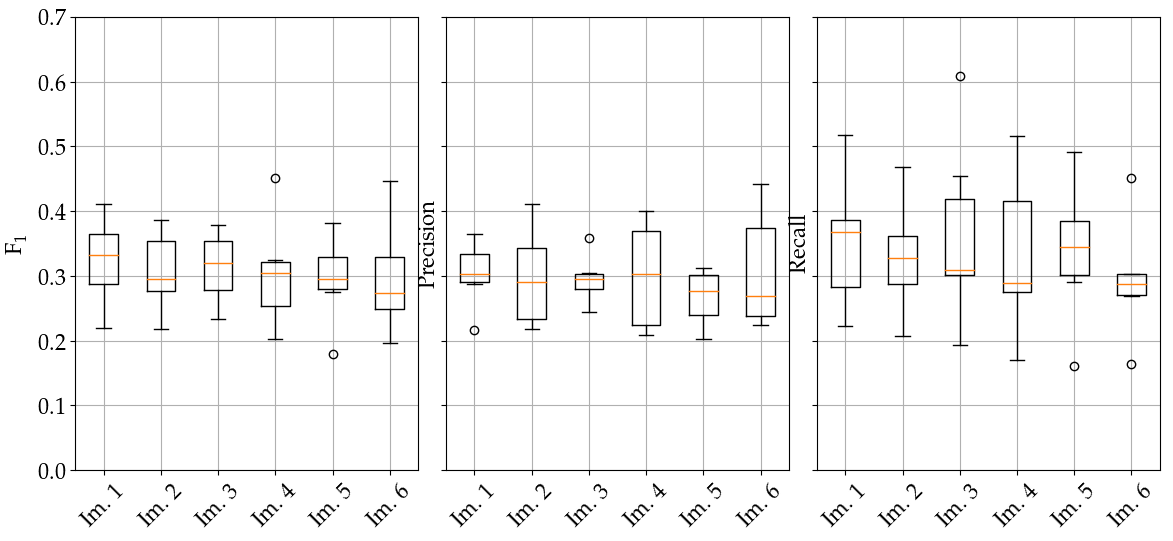

In [51]:
def plots(f1,rec,prec):
    perf_list = [f1, rec, prec]
    the_thicks = ["Im. 1","Im. 2","Im. 3","Im. 4","Im. 5","Im. 6"]
    metrics_name=["F$_{1}$", "Precision", "Recall"]
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(14, 6), sharex=True, sharey=True, dpi=100)
    print(ax.shape)
    plt.subplots_adjust(wspace=0.08, hspace=0.10)
    for i in range(3):
        n_images = 6
        data_list = [None] * n_images

        for j in range(n_images):
            mask = perf_list[i][:,j] == 0
            new_data = perf_list[i][:,j][np.invert(mask)]
            data_list[j] = new_data


        ax[i].boxplot(data_list)
        ax[i].grid()
        ax[i].set_xticks(range(1,7))
        ax[i].set_xticklabels(the_thicks, rotation=45)
        ax[i].set_ylabel(metrics_name[i])
        ax[i].set_ylim([0,0.7])
    plt.show()
    
plots(f1,rec,prec)

In [52]:
f1, prec, rec = get_validation_data("random_patches", classifiers[1])

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987097,)
validation_target_vec.shape (987097,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (989035,)
validation_target_vec.shape (989035,)
	:::: Seed : 4 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


validation_feat_vec.shape (987760,)
validation_target_vec.shape (987760,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (987658,)
validation_target_vec.shape (987658,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987338,)
validation_target_vec.shape (987338,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987035,)
validation_target_vec.shape (987035,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987913,)
validation_target_vec.shape (987913,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (988219,)
validation_target_vec.shape (988219,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,

0.209938138291 0.104561973006
0.251515697628 0.127308018765
0.204634177635 0.111230592102
(3,)


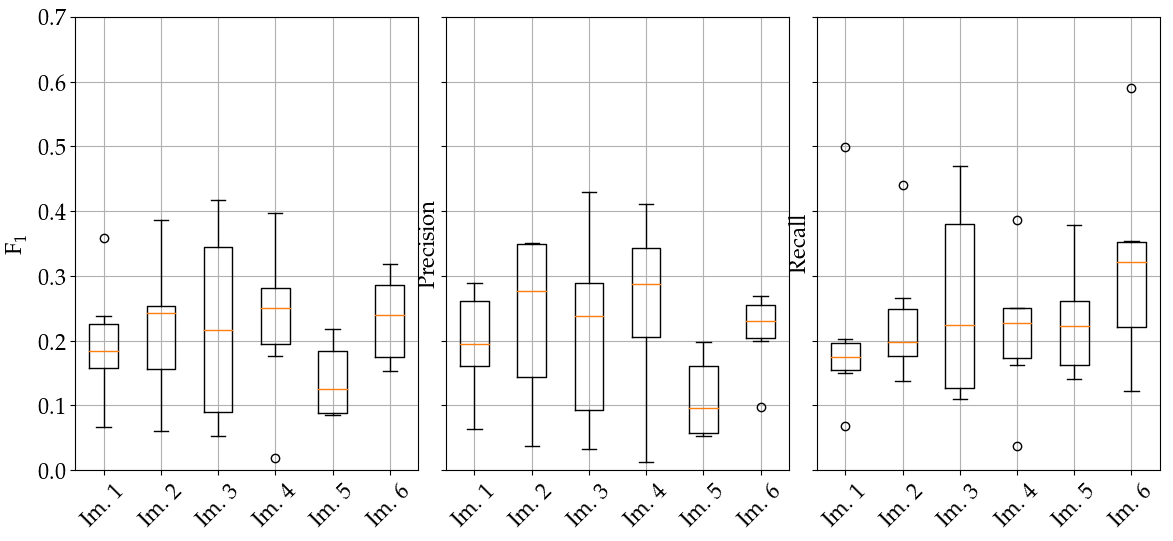

In [53]:
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())

plots(f1,rec,prec)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987097,)
validation_target_vec.shape (987097,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (989035,)
validation_target_vec.shape (989035,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987760,)
validation_target_vec.shape (987760,)
	:::: Seed : 5 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


validation_feat_vec.shape (987658,)
validation_target_vec.shape (987658,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987338,)
validation_target_vec.shape (987338,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987035,)
validation_target_vec.shape (987035,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987913,)
validation_target_vec.shape (987913,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (988219,)
validation_target_vec.shape (988219,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986995,

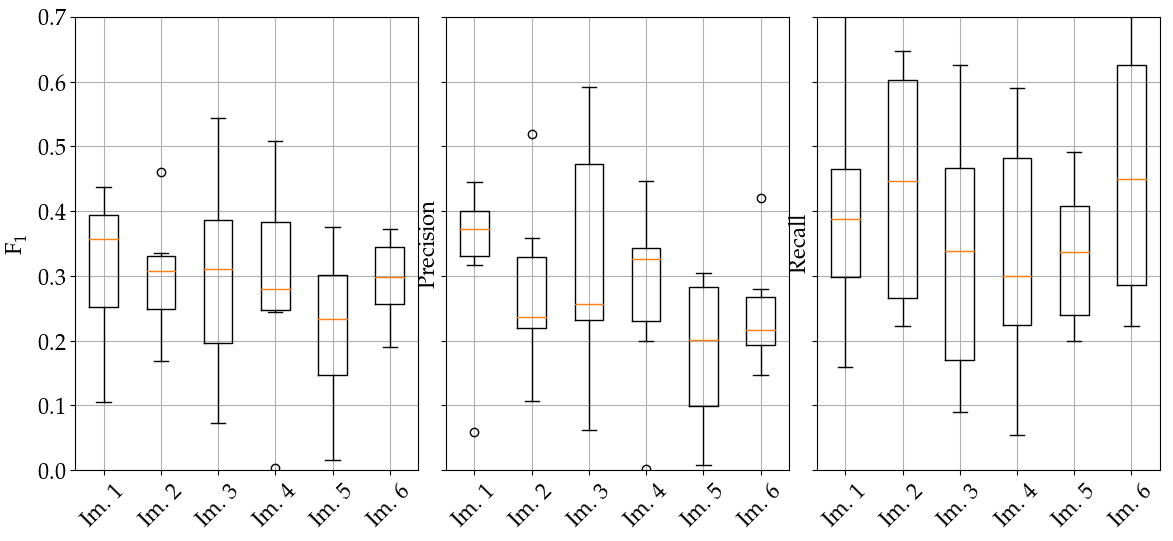

In [58]:
f1, prec, rec = get_validation_data("random_patches", classifiers[2])
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())
plots(f1,rec,prec)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986953,)
validation_target_vec.shape (986953,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986865,)
validation_target_vec.shape (986865,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987131,)
validation_target_vec.shape (987131,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986794,)
validation_target_vec.shape (986794,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986837,)
validation_target_vec.shape (986837,)

/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future



	:::: Seed : 5 ::::
validation_feat_vec.shape (986805,)
validation_target_vec.shape (986805,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (986823,)
validation_target_vec.shape (986823,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987084,)
validation_target_vec.shape (987084,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986897,)
validation_target_vec.shape (986897,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (986934,)
validation_target_vec.shape (986934,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986927,)
validation_target_vec.shape (986927,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986767,)
validation_target_vec.shape (986767,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987350,)
validation_target_vec.shape (987350,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987673,)
validation_target_vec.shape (987673,)
	:::: Seed : 5 ::::
validation_fe

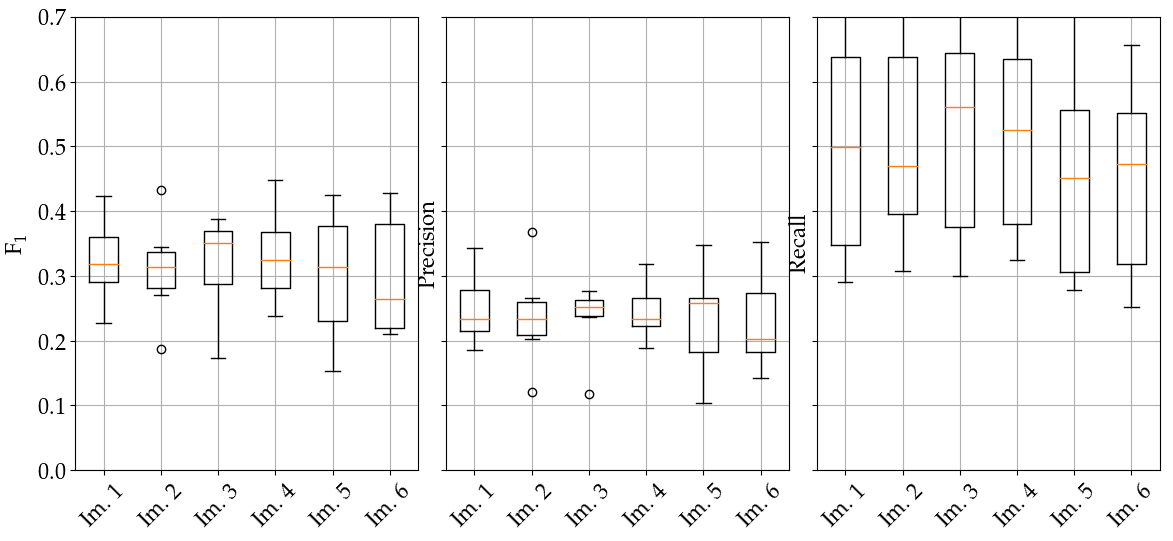

In [59]:
f1, prec, rec = get_validation_data("halton_patches", classifiers[2])
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())
plots(f1,rec,prec)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986953,)
validation_target_vec.shape (986953,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986865,)
validation_target_vec.shape (986865,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987131,)
validation_target_vec.shape (987131,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986794,)
validation_target_vec.shape (986794,)
	:::: Seed : 4 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


validation_feat_vec.shape (986837,)
validation_target_vec.shape (986837,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986805,)
validation_target_vec.shape (986805,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (986823,)
validation_target_vec.shape (986823,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987084,)
validation_target_vec.shape (987084,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986897,)
validation_target_vec.shape (986897,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (986934,)
validation_target_vec.shape (986934,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986927,)
validation_target_vec.shape (986927,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986767,)
validation_target_vec.shape (986767,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987350,)
validation_target_vec.shape (987350,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987673,

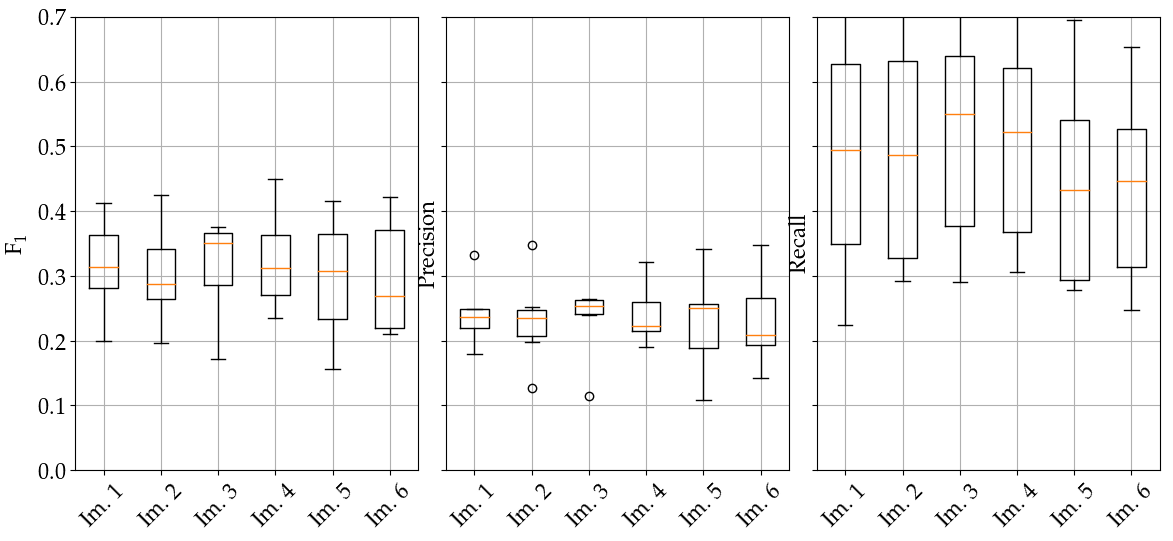

In [60]:
f1, prec, rec = get_validation_data("halton_patches", classifiers[3])
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())
plots(f1,rec,prec)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987097,)
validation_target_vec.shape (987097,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (989035,)
validation_target_vec.shape (989035,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987760,)
validation_target_vec.shape (987760,)
	:::: Seed : 5 ::::


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


validation_feat_vec.shape (987658,)
validation_target_vec.shape (987658,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987338,)
validation_target_vec.shape (987338,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987035,)
validation_target_vec.shape (987035,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987913,)
validation_target_vec.shape (987913,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (988219,)
validation_target_vec.shape (988219,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 5 ::::
validation_feat_vec.shape (986995,

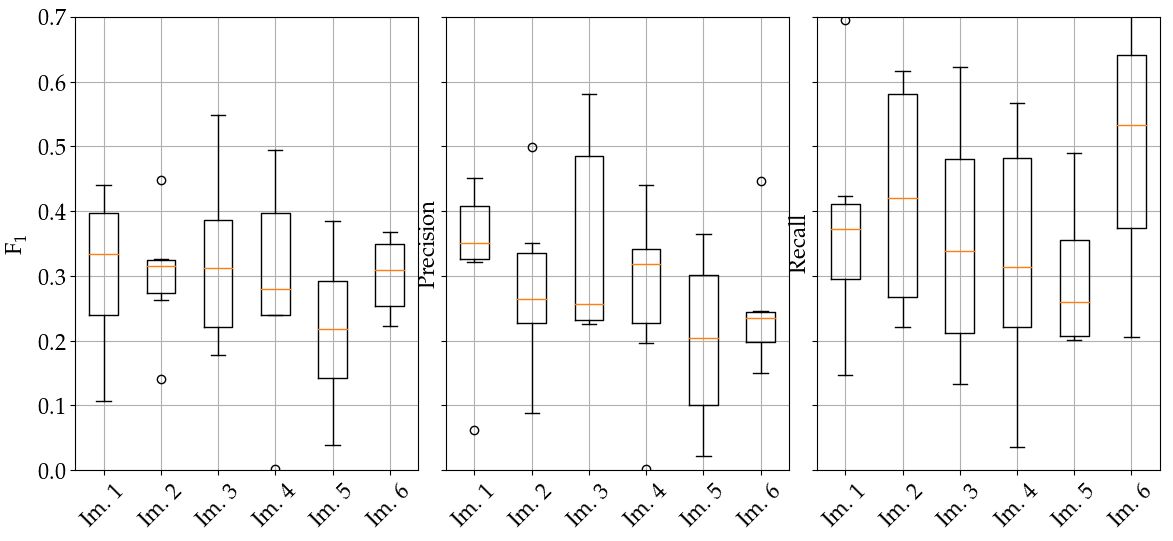

In [61]:
f1, prec, rec = get_validation_data("random_patches", classifiers[3])
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())
plots(f1,rec,prec)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987097,)
validation_target_vec.shape (987097,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (989035,)
validation_target_vec.shape (989035,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987760,)
validation_target_vec.shape (987760,)


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


	:::: Seed : 5 ::::
validation_feat_vec.shape (987658,)
validation_target_vec.shape (987658,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (987338,)
validation_target_vec.shape (987338,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987035,)
validation_target_vec.shape (987035,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (987913,)
validation_target_vec.shape (987913,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (988219,)
validation_target_vec.shape (988219,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 5 ::::
validation_fea

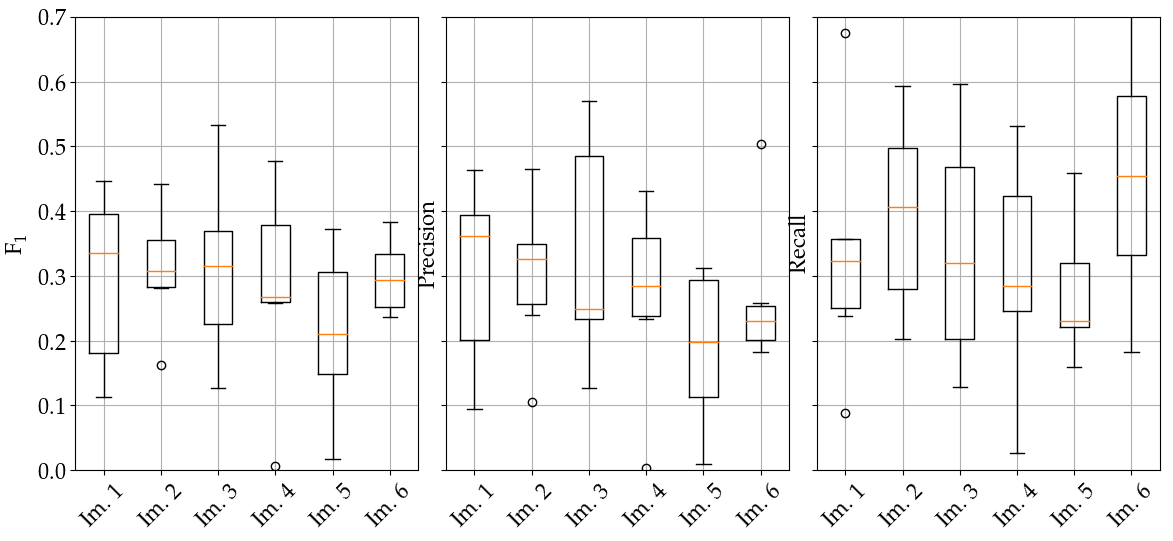

In [62]:
f1, prec, rec = get_validation_data("random_patches", classifiers[4])
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())
plots(f1,rec,prec)

:::: Image : 1+_20 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986953,)
validation_target_vec.shape (986953,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986865,)
validation_target_vec.shape (986865,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987131,)
validation_target_vec.shape (987131,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986794,)
validation_target_vec.shape (986794,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (986837,)
validation_target_vec.shape (986837,)


/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:37: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/rpezoa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future


	:::: Seed : 5 ::::
validation_feat_vec.shape (986805,)
validation_target_vec.shape (986805,)
	:::: Seed : 6 ::::
validation_feat_vec.shape (986823,)
validation_target_vec.shape (986823,)
	:::: Seed : 7 ::::
validation_feat_vec.shape (987084,)
validation_target_vec.shape (987084,)
	:::: Seed : 8 ::::
validation_feat_vec.shape (986897,)
validation_target_vec.shape (986897,)
	:::: Seed : 9 ::::
validation_feat_vec.shape (986934,)
validation_target_vec.shape (986934,)


:::: Image : 1+_25 ::::
	:::: Seed : 0 ::::
validation_feat_vec.shape (986927,)
validation_target_vec.shape (986927,)
	:::: Seed : 1 ::::
validation_feat_vec.shape (986767,)
validation_target_vec.shape (986767,)
	:::: Seed : 2 ::::
validation_feat_vec.shape (987350,)
validation_target_vec.shape (987350,)
	:::: Seed : 3 ::::
validation_feat_vec.shape (986995,)
validation_target_vec.shape (986995,)
	:::: Seed : 4 ::::
validation_feat_vec.shape (987673,)
validation_target_vec.shape (987673,)
	:::: Seed : 5 ::::
validation_fea

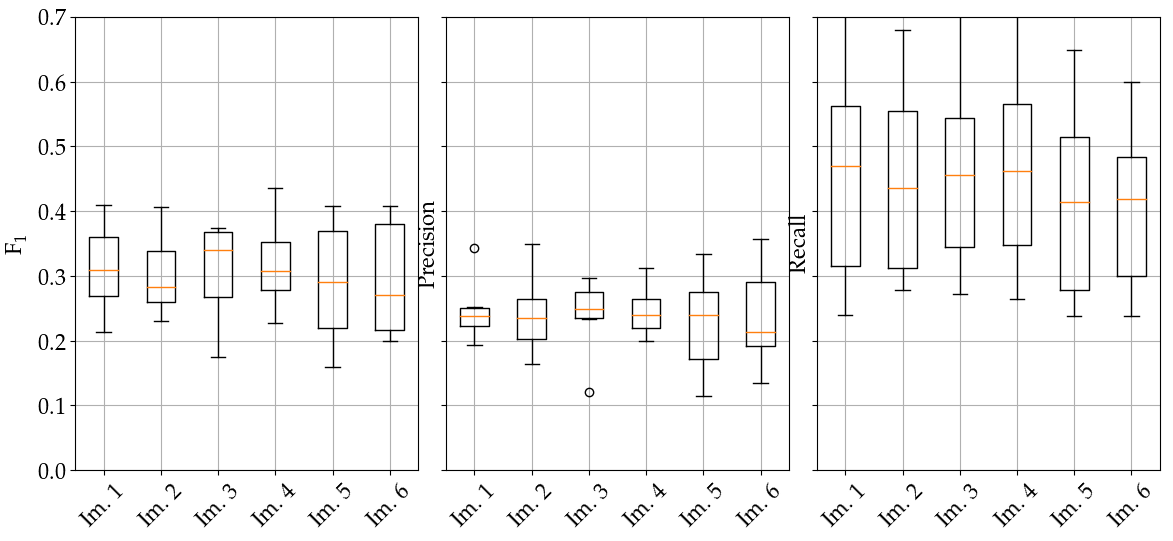

In [63]:
f1, prec, rec = get_validation_data("halton_patches", classifiers[4])
print(f1.mean(), f1.std())
print(prec.mean(), prec.std())
print(rec.mean(), rec.std())
plots(f1,rec,prec)

In [42]:
def show_box_plot(title, ylabel, data):
    
    plt.figure(figsize=(10, 6))
    n_seeds,n_images = data.shape
    data_list = [None] * n_images
    
    for i in range(n_images):
        mask = data[:,i] == 0
        new_data = data[:,i][np.invert(mask)]
        data_list[i] = new_data
    #print(data_list)    
    bp = plt.boxplot(data_list)
    #plt.title(title)
    plt.grid()
    #plt.xlabel("Image Id.")
    plt.ylabel(ylabel)
    plt.xticks([1,2,3,4,5,6], ["Im. 1","Im. 2","Im. 3","Im. 4","Im. 5","Im. 6"], rotation=45)
    
    #for line in bp['medians']:
    ## get position data for median line
    #    x, y = line.get_xydata()[1] # top of median line
    #    median_val = line.get_ydata()
    #    #print(median_val[0])
    #    #print("x,y",x,y)
    #    # overlay median value
    #    plt.text(x+0.30, y, '%.2f' % median_val[0],
    #         horizontalalignment='center') # draw above, centered
    plt.show()
 

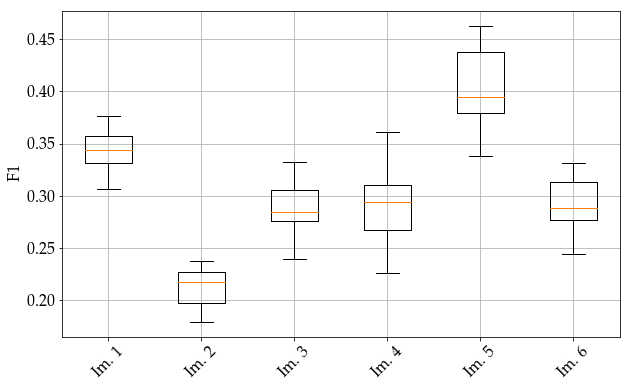

In [44]:
show_box_plot("Halton", "F1", f1.T)